In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')

In [4]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
data['real_duration'] = data['end'] - data['start']

In [6]:
# data['label_duration'] = round(data['real_duration'])
data['label_duration'] = np.where(data['real_duration'] <= 1, '0-1', '')
data['label_duration'] = np.where((data['real_duration'] > 1) & (data['real_duration'] <= 2), '1-2', data['label_duration'])
data['label_duration'] = np.where((data['real_duration'] > 2) & (data['real_duration'] <= 3), '2-3', data['label_duration'])
data['label_duration'] = np.where(data['real_duration'] > 3, '3-4', data['label_duration'])

data

,slice_file_name,fsID,start,end,salience,fold,classID,class,real_duration,label_duration
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551,0-1
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,4.000000,3-4
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,4.000000,3-4
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,4.000000,3-4
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,4.000000,3-4
...,...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,4.000000,3-4
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545,2-3
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983,3-4
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098,2-3


In [7]:
data.describe()

,fsID,start,end,salience,fold,classID,real_duration
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,3.607904
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,0.973570
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,0.054517
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,4.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,4.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000,4.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   real_duration    8732 non-null   float64
 9   label_duration   8732 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 682.3+ KB


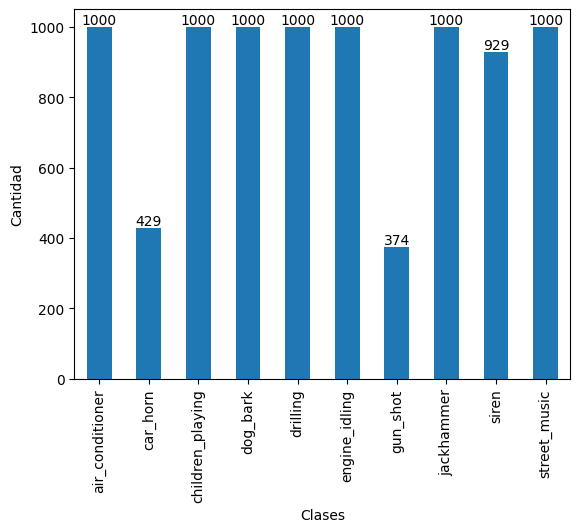

In [9]:
ax = data.groupby("class").count()['classID'].plot.bar(xlabel='Clases', ylabel='Cantidad')

for container in ax.containers:
    ax.bar_label(container)

In [10]:
# data['label_salience'] = 'primer plano' if data['salience'] == 1 else 'segundo plano'
data['label_salience'] = np.where(data['salience'] == 1, 'primer plano', 'segundo plano')

<AxesSubplot: ylabel='class'>

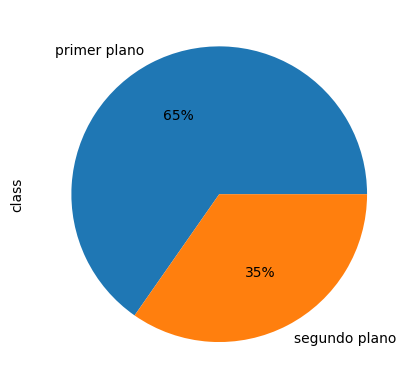

In [11]:
data.groupby("label_salience").count()['class'].plot.pie(autopct='%1.0f%%')
# 1 = foreground
# 2 = background

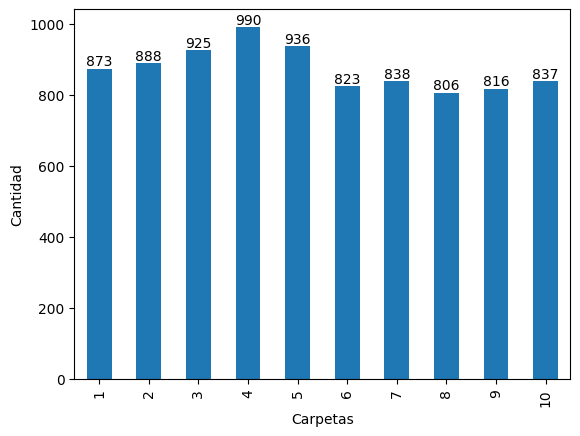

In [12]:
ax = data.groupby("fold").count()['class'].plot.bar(xlabel='Carpetas', ylabel='Cantidad')
for container in ax.containers:
    ax.bar_label(container)

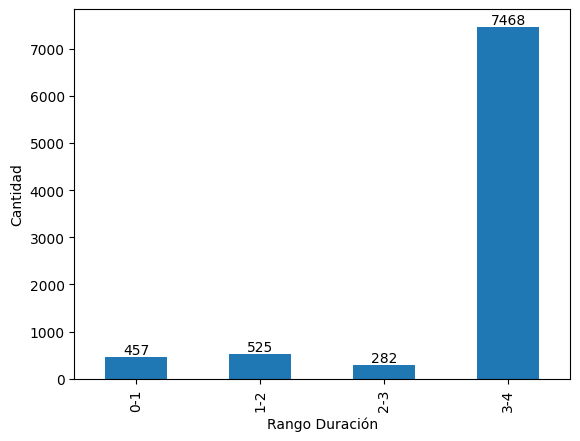

In [13]:
ax = data.groupby("label_duration").count().real_duration.plot.bar(xlabel='Rango Duración', ylabel='Cantidad')
for container in ax.containers:
    ax.bar_label(container)

In [14]:
data[data.real_duration < 1]

,slice_file_name,fsID,start,end,salience,fold,classID,class,real_duration,label_duration,label_salience
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551,0-1,primer plano
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,0.648525,0-1,segundo plano
11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn,0.405328,0-1,segundo plano
101,102103-3-0-0.wav,102103,1.976030,2.508892,2,10,3,dog_bark,0.532862,0-1,segundo plano
102,102103-3-1-0.wav,102103,4.179637,4.568182,2,10,3,dog_bark,0.388545,0-1,segundo plano
...,...,...,...,...,...,...,...,...,...,...,...
8537,94868-1-1-0.wav,94868,1.076489,1.468143,1,1,1,car_horn,0.391654,0-1,primer plano
8538,94868-1-2-0.wav,94868,2.381256,2.750530,1,1,1,car_horn,0.369274,0-1,primer plano
8560,96159-4-1-0.wav,96159,4.534405,5.107616,1,8,4,drilling,0.573211,0-1,primer plano
8627,98223-7-10-0.wav,98223,73.762488,74.751759,1,1,7,jackhammer,0.989271,0-1,primer plano


In [15]:
data[data.real_duration >= 4]

,slice_file_name,fsID,start,end,salience,fold,classID,class,real_duration,label_duration,label_salience
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,4.0,3-4,primer plano
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,4.0,3-4,primer plano
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,4.0,3-4,primer plano
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,4.0,3-4,primer plano
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing,4.0,3-4,primer plano
...,...,...,...,...,...,...,...,...,...,...,...
8723,99812-1-0-0.wav,99812,38.176254,42.176254,2,7,1,car_horn,4.0,3-4,segundo plano
8724,99812-1-0-1.wav,99812,38.676254,42.676254,2,7,1,car_horn,4.0,3-4,segundo plano
8725,99812-1-0-2.wav,99812,39.176254,43.176254,2,7,1,car_horn,4.0,3-4,segundo plano
8726,99812-1-1-0.wav,99812,89.207778,93.207778,2,7,1,car_horn,4.0,3-4,segundo plano


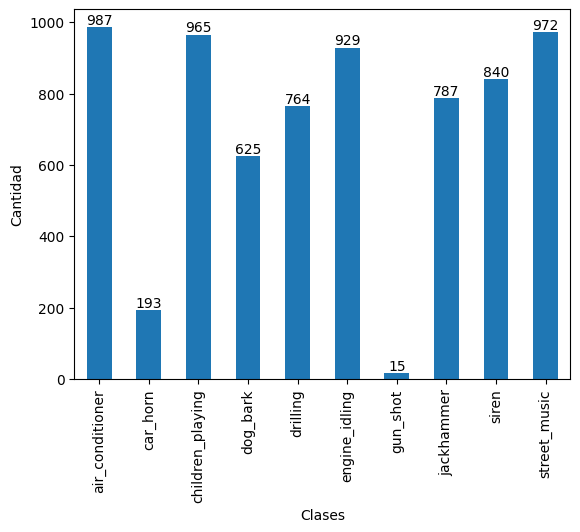

In [16]:
# menos de 4 segundos

ax = data[data.real_duration >= 4].groupby("class").count()['classID'].plot.bar(xlabel='Clases', ylabel='Cantidad')
for container in ax.containers:
    ax.bar_label(container)